https://docs.pymc.io/notebooks/api_quickstart.html#4.1-Predicting-on-hold-out-data

In many cases you want to predict on unseen / hold-out data. This is especially relevant in Probabilistic Machine Learning and Bayesian Deep Learning. While we plan to improve the API in this regard, this can currently be achieved with a theano.shared variable. These are theano tensors whose values can be changed later. Otherwise they can be passed into PyMC3 just like any other numpy array or tensor.

This distinction is significant since internally all models in PyMC3 are giant symbolic expressions. When you pass data directly into a model, you are giving Theano permission to treat this data as a constant and optimize it away as it sees fit. If you need to change this data later you might not have a way to point at it in the symbolic expression. Using theano.shared offers a way to point to a place in that symbolic expression, and change what is there.

## Try this theano version showed

In [1]:
import theano
import pymc3 as pm
import numpy as np

/Users/balarsen/miniconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [ ]:

x = np.random.randn(100)
y = x > 0

x_shared = theano.shared(x)
y_shared = theano.shared(y)

with pm.Model() as model:
    coeff = pm.Normal('x', mu=0, sd=1)
    logistic = pm.math.sigmoid(coeff * x_shared)
    pm.Bernoulli('obs', p=logistic, observed=y_shared)
    trace = pm.sample(50000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/Users/balarsen/miniconda3/lib/python3.6/site-packages/pymc3/model.py:384: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  back from the array dtype to the variable dtype.
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [x]
 87%|████████▋ | 44161/50500 [00:25<00:03, 1722.62it/s]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x110df7908>,
      dtype=object)

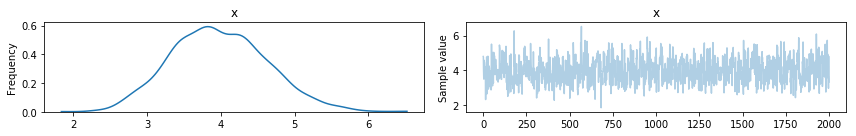

In [10]:
pm.traceplot(trace, combined=True)

In [4]:
x_shared.set_value([-1, 0, 1.])
y_shared.set_value([0, 0, 0]) # dummy values

with model:
    post_pred = pm.sample_ppc(trace, samples=500)

100%|██████████| 500/500 [00:00<00:00, 516.63it/s]


In [5]:
post_pred['obs'].mean(axis=0)


array([0.018, 0.492, 0.982])

## Without the theano stuff?

In [6]:

x = np.random.randn(100)
y = x > 0

with pm.Model() as model:
    coeff = pm.Normal('x', mu=0, sd=1)
    logistic = pm.math.sigmoid(coeff * x)
    pm.Bernoulli('obs', p=logistic, observed=y)
    trace = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/Users/balarsen/miniconda3/lib/python3.6/site-packages/pymc3/model.py:384: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(var.dtype, float):
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [x]
100%|██████████| 1000/1000 [00:00<00:00, 1711.85it/s]
The acceptance probability does not match the target. It is 0.883377133265646, but should be close to 0.8. Try to increase the number of tuning steps.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x110e6f400>,
      dtype=object)

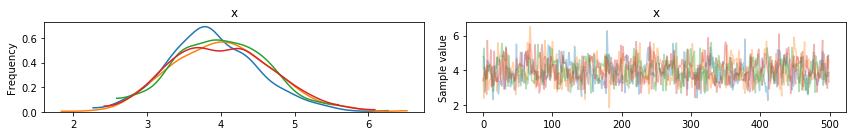

In [7]:
pm.traceplot(trace)

In [8]:

with model:
    post_pred = pm.sample_ppc(trace, samples=500)

100%|██████████| 500/500 [00:00<00:00, 3179.56it/s]


In [9]:
post_pred['obs'].mean(axis=0)


array([0.472, 0.346, 0.046, 0.004, 0.656, 0.876, 0.002, 0.698, 0.126,
       0.992, 0.984, 0.272, 0.53 , 0.882, 0.706, 0.016, 0.232, 0.732,
       0.998, 0.01 , 0.926, 0.618, 0.702, 0.956, 0.006, 0.098, 0.33 ,
       0.93 , 0.   , 0.924, 0.85 , 0.026, 0.806, 0.022, 0.972, 0.31 ,
       0.182, 0.342, 0.264, 0.192, 0.994, 0.286, 0.82 , 0.23 , 0.922,
       0.608, 1.   , 0.33 , 0.998, 0.97 , 0.   , 0.666, 0.866, 0.578,
       0.996, 0.998, 0.16 , 0.974, 1.   , 0.162, 0.056, 0.924, 0.94 ,
       0.82 , 0.   , 0.962, 0.866, 0.12 , 0.978, 0.502, 0.248, 0.   ,
       0.72 , 0.342, 0.006, 0.906, 0.006, 0.676, 1.   , 0.168, 0.882,
       0.012, 0.046, 0.506, 0.978, 0.144, 0.252, 0.752, 0.768, 0.938,
       1.   , 0.002, 0.226, 0.794, 0.966, 0.024, 0.33 , 0.326, 0.986,
       1.   ])